In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('../data/raw/XGBoost_train.csv')

In [7]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [8]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [15]:
df.TWF.unique()

array([0, 1], dtype=int64)

In [16]:
df.shape

(136429, 14)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,136429.0,68214.000000,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0


In [20]:
df.loc[:,"Machine failure"].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

In [24]:
df.duplicated().value_counts()

False    136429
Name: count, dtype: int64

In [30]:
df[df.loc[:,"Machine failure"]==1][['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)

,TWF,HDF,PWF,OSF,RNF
0,1936,1450,1824,1612,2142
1,212,698,324,536,6


In [39]:
import seaborn as sns

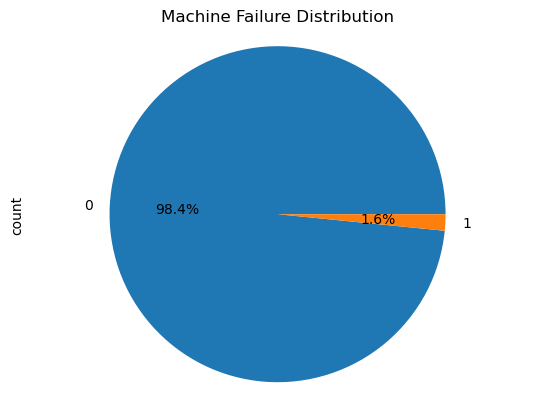

In [38]:
import matplotlib.pyplot as plt

df.loc[:, "Machine failure"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Machine Failure Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [45]:
target_col = 'Machine failure'

num_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Machine failure'
]


C:\Users\Farnaz Ashrafi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


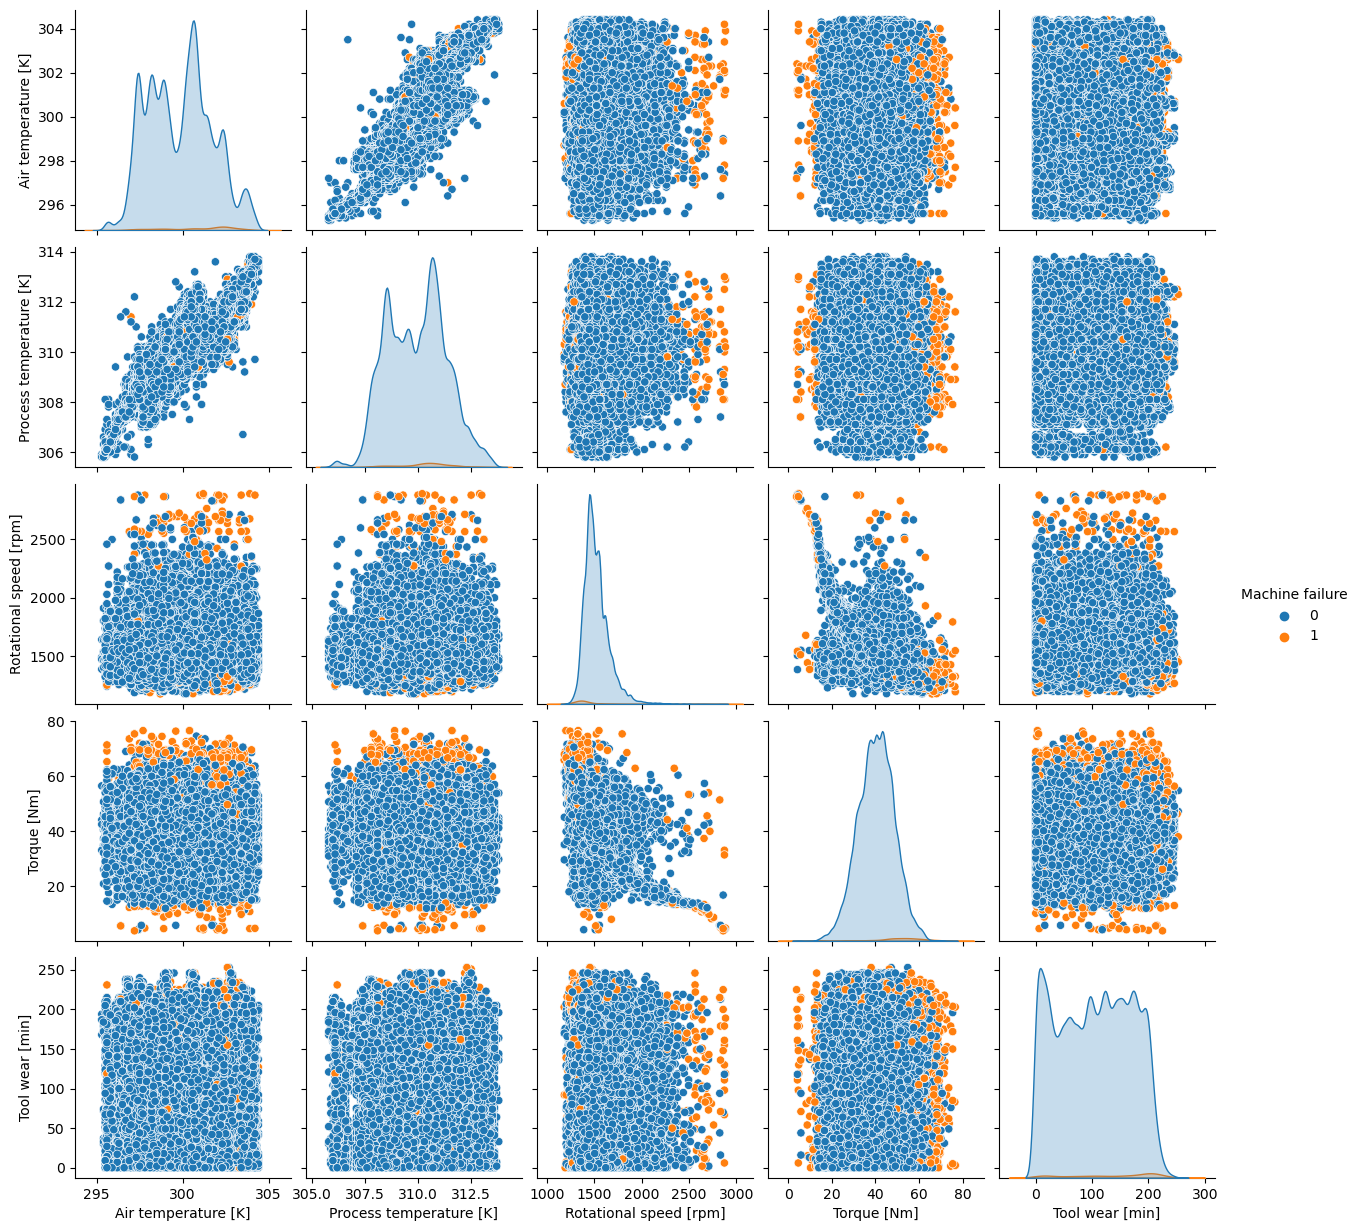

In [46]:
sns.pairplot(data=df.loc[:,num_cols] , hue=target_col )

Machine failure,0,1
Type,,
H,0.987000,0.013000
L,0.983273,0.016727
M,0.986408,0.013592


<Axes: xlabel='Type'>

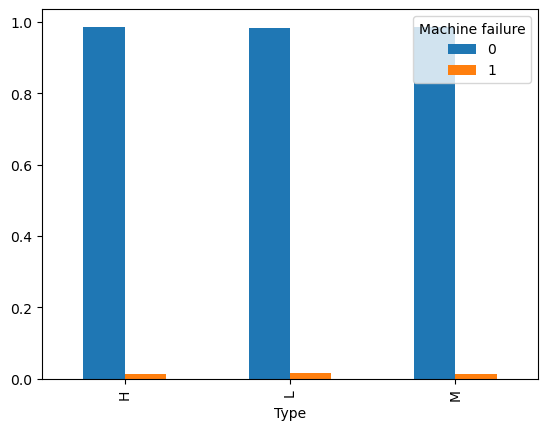

In [59]:
var=pd.crosstab(index=df.Type , columns=df.loc[:,'Machine failure'] , normalize='index')
display(var)
var.plot(kind='bar')

In [62]:
pd.crosstab(index=df.Type , columns='count').sort_values(ascending=False , by="count")

col_0,count
Type,
L,95354
M,32152
H,8923


C:\Users\Farnaz Ashrafi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


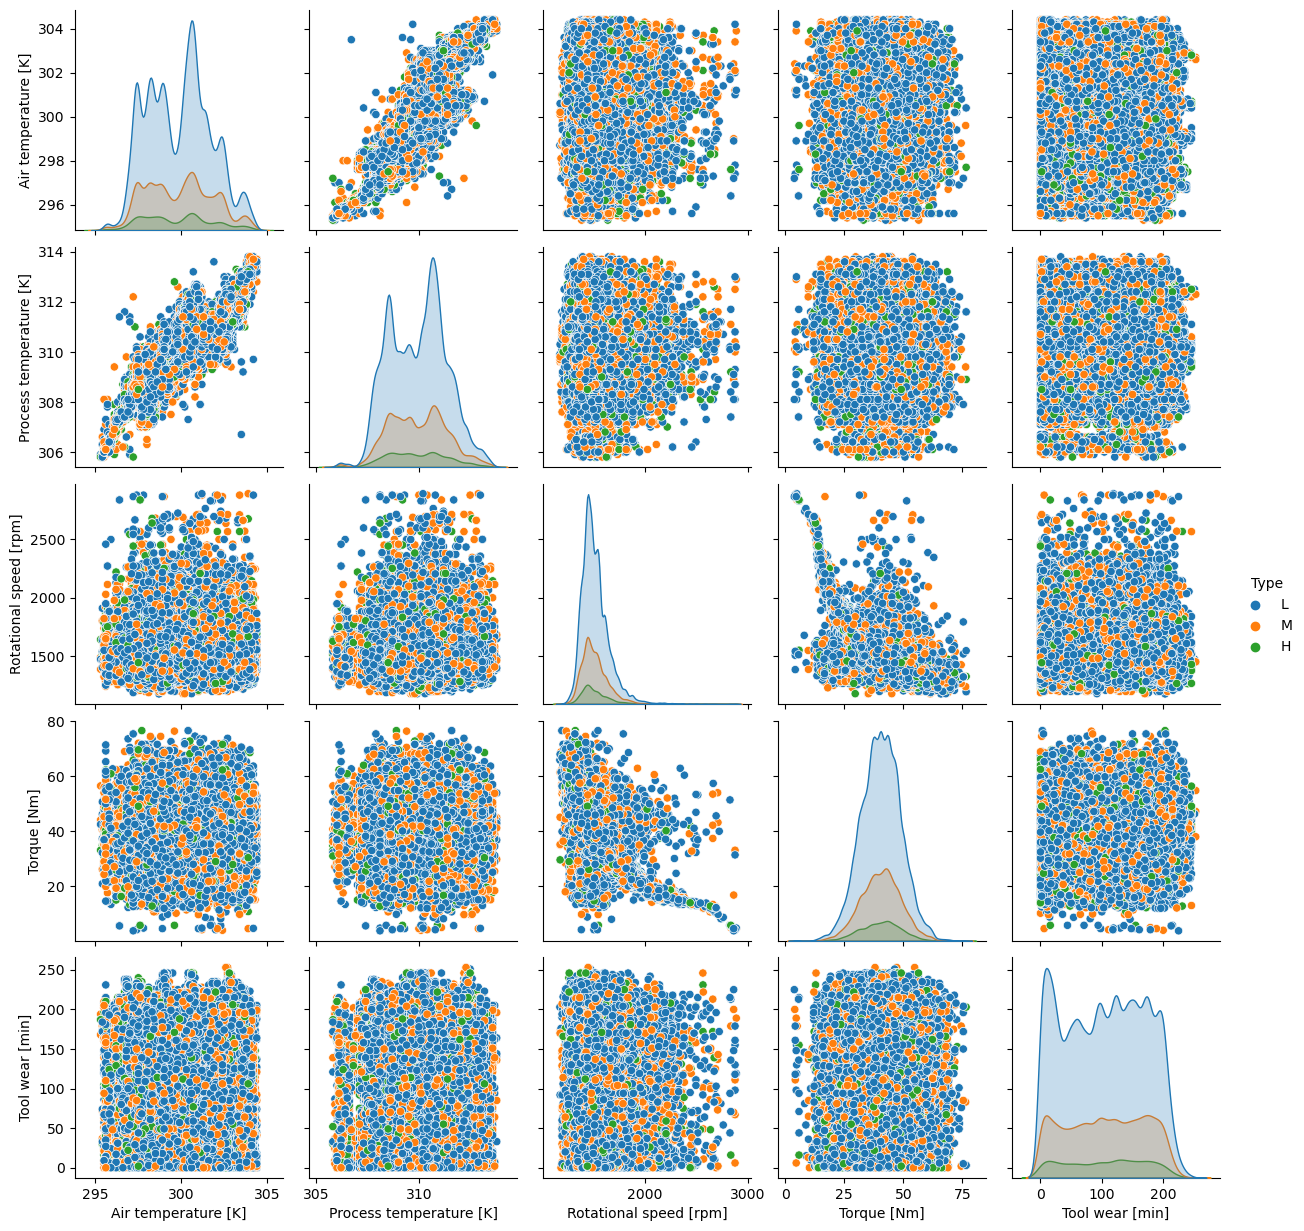

In [61]:
cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Type'
]

sns.pairplot(data=df.loc[:, cols], hue='Type')